### 311 Road Condition Data in Oakland for 2019 (Take 2) 

This notebook will attempt to accomplish the following:
-  Combine the geodataframe of 311 road service requests we created in this notebook with a geodataframe of census block group polygons in Oakland from the 2010 census. 
- Produce a map that visualizes the frequency of point occurances (that is 311 requests) in each polygon (census blocks). 

These products will then be used to compare to existing race and income maps created in prior weeks, as well as a similar notebook my partner created for 2009 data to see how the spatial distrobution of requests and repsonse times have changed over time.


### Data Import

In [2]:
# for data wrangling
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# for basemaps 
import contextily as ctx

# to for advanced plotting
import matplotlib.pyplot as plt

In [3]:
## Note: There were a few requests that had no spatial data that I filtered out in excel.
gdf = gpd.read_file('Data/2019_OAK_311_NoBlank.csv')

### Data Exploration and Formatting

In [4]:
gdf.head()

REQUESTID   DATETIMEINIT       SOURCE                     DESCRIPTION  \
0    927576  7/23/19 15:38  SeeClickFix   Streets - Potholes/Depression   
1    918469  6/25/19 08:34  SeeClickFix      Streets - Guardrail Repair   
2    922854   7/9/19 12:17  SeeClickFix   Streets - Potholes/Depression   
3    917741  6/22/19 16:00  SeeClickFix  Streets - Street Deterioration   
4    927190  7/22/19 16:17  SeeClickFix  Streets - Street Deterioration   

  REQCATEGORY  STATUS REFERREDTO DATETIMECLOSED          SRX          SRY  \
0    STREETSW  CLOSED             7/26/19 13:45  6055962.501   2132386.75   
1    STREETSW  CLOSED             7/10/19 18:11  6063364.409  2136673.615   
2    STREETSW  CLOSED             7/22/19 16:40  6055410.001  2116416.751   
3    STREETSW    OPEN                            6076796.539  2120845.822   
4    STREETSW    OPEN                              6071960.1   2128430.85   

  COUNCILDISTRICT BEAT Time to Close          LAT          LONG geometry  
0            CCD1  12Y             3  37.83815973  -122.2513029     None  
1            CCD1  13Y            15  37.85030836   -122.225949     None  
2            CCD2  19X            13  37.79428033  -122.2521805     None  
3            CCD4  22Y          Open  37.80751844  -122.1784517     None  
4            CCD4  13Z          Open  37.82810651  -122.1956658     None

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        5285 non-null   object  
 1   DATETIMEINIT     5285 non-null   object  
 2   SOURCE           5285 non-null   object  
 3   DESCRIPTION      5285 non-null   object  
 4   REQCATEGORY      5285 non-null   object  
 5   STATUS           5285 non-null   object  
 6   REFERREDTO       5285 non-null   object  
 7   DATETIMECLOSED   5285 non-null   object  
 8   SRX              5285 non-null   object  
 9   SRY              5285 non-null   object  
 10  COUNCILDISTRICT  5285 non-null   object  
 11  BEAT             5285 non-null   object  
 12  Time to Close    5285 non-null   object  
 13  LAT              5285 non-null   object  
 14  LONG             5285 non-null   object  
 15  geometry         0 non-null      geometry
dtypes: geometry(1), object(15)
memory 

In [6]:
## Need to change our Latitude and Longitude to floats in order to plot.
gdf['LAT'] = gdf['LAT'].astype('float64')

In [7]:
gdf['LONG'] = gdf['LONG'].astype('float64')

In [8]:
## Need to establish the geometry as well since this is a csv file 
gdf = gpd.GeoDataFrame(gdf, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(gdf.LONG, gdf.LAT))

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        5285 non-null   object  
 1   DATETIMEINIT     5285 non-null   object  
 2   SOURCE           5285 non-null   object  
 3   DESCRIPTION      5285 non-null   object  
 4   REQCATEGORY      5285 non-null   object  
 5   STATUS           5285 non-null   object  
 6   REFERREDTO       5285 non-null   object  
 7   DATETIMECLOSED   5285 non-null   object  
 8   SRX              5285 non-null   object  
 9   SRY              5285 non-null   object  
 10  COUNCILDISTRICT  5285 non-null   object  
 11  BEAT             5285 non-null   object  
 12  Time to Close    5285 non-null   object  
 13  LAT              5285 non-null   float64 
 14  LONG             5285 non-null   float64 
 15  geometry         5285 non-null   geometry
dtypes: float64(2), geometry(1), object

That looks much better now! 

In [10]:
gdf.head()

REQUESTID   DATETIMEINIT       SOURCE                     DESCRIPTION  \
0    927576  7/23/19 15:38  SeeClickFix   Streets - Potholes/Depression   
1    918469  6/25/19 08:34  SeeClickFix      Streets - Guardrail Repair   
2    922854   7/9/19 12:17  SeeClickFix   Streets - Potholes/Depression   
3    917741  6/22/19 16:00  SeeClickFix  Streets - Street Deterioration   
4    927190  7/22/19 16:17  SeeClickFix  Streets - Street Deterioration   

  REQCATEGORY  STATUS REFERREDTO DATETIMECLOSED          SRX          SRY  \
0    STREETSW  CLOSED             7/26/19 13:45  6055962.501   2132386.75   
1    STREETSW  CLOSED             7/10/19 18:11  6063364.409  2136673.615   
2    STREETSW  CLOSED             7/22/19 16:40  6055410.001  2116416.751   
3    STREETSW    OPEN                            6076796.539  2120845.822   
4    STREETSW    OPEN                              6071960.1   2128430.85   

  COUNCILDISTRICT BEAT Time to Close        LAT        LONG  \
0            CCD1  12Y             3  37.838160 -122.251303   
1            CCD1  13Y            15  37.850308 -122.225949   
2            CCD2  19X            13  37.794280 -122.252180   
3            CCD4  22Y          Open  37.807518 -122.178452   
4            CCD4  13Z          Open  37.828107 -122.195666   

                      geometry  
0  POINT (-122.25130 37.83816)  
1  POINT (-122.22595 37.85031)  
2  POINT (-122.25218 37.79428)  
3  POINT (-122.17845 37.80752)  
4  POINT (-122.19567 37.82811)

<AxesSubplot:>

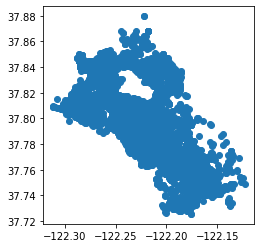

In [11]:
gdf.plot()

Just a check to see that we have good spatial data, and that looks almost perfectly like the outline of Oakland city limits.

### Statistics

Let's run some statistics on how quickly the city is repsonding to requests. 

Some of the requests from 2019 have yet to be closed, so we're going to filter these out for this portion since the presence of strings interferes with our ability to perform statistical inquires. 

In [12]:
gdf_no_open = gdf[gdf['Time to Close']!='Open']

In [13]:
## Now that we got rid of the strings, let's make sure our remaining values ae all integers.
gdf_no_open['Time to Close'] = gdf_no_open['Time to Close'].astype('int64')

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [14]:
gdf_no_open.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3778 entries, 0 to 5284
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        3778 non-null   object  
 1   DATETIMEINIT     3778 non-null   object  
 2   SOURCE           3778 non-null   object  
 3   DESCRIPTION      3778 non-null   object  
 4   REQCATEGORY      3778 non-null   object  
 5   STATUS           3778 non-null   object  
 6   REFERREDTO       3778 non-null   object  
 7   DATETIMECLOSED   3778 non-null   object  
 8   SRX              3778 non-null   object  
 9   SRY              3778 non-null   object  
 10  COUNCILDISTRICT  3778 non-null   object  
 11  BEAT             3778 non-null   object  
 12  Time to Close    3778 non-null   int64   
 13  LAT              3778 non-null   float64 
 14  LONG             3778 non-null   float64 
 15  geometry         3778 non-null   geometry
dtypes: float64(2), geometry(1), int64(

In [15]:
## Now we can run some numbers
gdf_no_open['Time to Close'].describe()

count    3778.000000
mean      141.172313
std       225.656483
min         0.000000
25%         7.000000
50%        32.000000
75%       127.000000
max       995.000000
Name: Time to Close, dtype: float64

In [16]:
gdf_no_open['Time to Close'].mean()

141.1723133933298

In [17]:
gdf_no_open['Time to Close'].median()

32.0

Interesting that the median and mean are so far apart, suggesting that there are some outliers.

Also the median here matches up pretty closely with days in a month, so we can say that of closed requests, Oakland closes half of complaints in roughly a month. 

<AxesSubplot:ylabel='Frequency'>

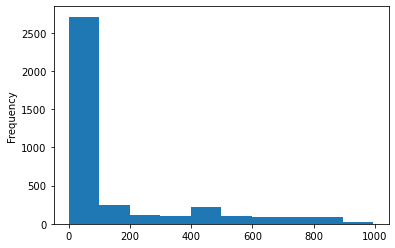

In [18]:
gdf_no_open['Time to Close'].plot.hist(bins=10)

Yeah, not a normal distrobution at all.

In [19]:
## For these, I can include open requests so I'll go back to the original geodataframe. 
gdf['COUNCILDISTRICT'].value_counts()

CCD4    1043
CCD1     788
CCD2     758
CCD7     708
CCD5     692
CCD3     668
CCD6     466
         162
Name: COUNCILDISTRICT, dtype: int64

A little unbalanced by council district.

In [20]:
gdf['SOURCE'].value_counts()

SeeClickFix       3593
Phone             1017
Email              307
Phone or Email     267
Voicemail           91
Other               10
Name: SOURCE, dtype: int64

People are mostly using the 311 app or website to submit complaints, although a decent amount by phone still.

In [21]:
gdf['STATUS'].value_counts()

CLOSED             3778
OPEN               1504
GONE ON ARRIVAL       2
REFERRED              1
Name: STATUS, dtype: int64

About 71% of 311 requests from 2019 have been closed as of October 2021.

### Joining Geodataframes

In [22]:
## Let's bring in the census block data
polydf = gpd.read_file('Data/Alameda_Census_Blocks_2010.geojson')

In [23]:
polydf.head()

statefp10 mtfcc10 uace10      name10   intptlat10 blockce10 awater10  \
0        06   G5040         Block 2024  +37.7514499      2024        0   
1        06   G5040         Block 2017  +37.7700438      2017        0   
2        06   G5040         Block 2011  +37.7945823      2011        0   
3        06   G5040         Block 2002  +37.8343484      2002        0   
4        06   G5040         Block 1005  +37.7783082      1005        0   

  funcstat10 aland10          geoid10 tractce10    intptlon10 ur10 countyfp10  \
0          S    1180  060014100002024    410000  -122.1244488             001   
1          S     553  060014073002017    407300  -122.2099801             001   
2          S   11797  060014081002011    408100  -122.1820803             001   
3          S     598  060014010002002    401000  -122.2699940             001   
4          S     139  060014061001005    406100  -122.2273093             001   

                                            geometry  
0  MULTIPOLYGON (((-122.12489 37.75164, -122.1247...  
1  MULTIPOLYGON (((-122.21025 37.77010, -122.2101...  
2  MULTIPOLYGON (((-122.18212 37.79493, -122.1818...  
3  MULTIPOLYGON (((-122.27004 37.83399, -122.2701...  
4  MULTIPOLYGON (((-122.22720 37.77830, -122.2272...

Cool, we have the unique census block number in the "geoid10" column and associated multipolygon for each block.

<AxesSubplot:>

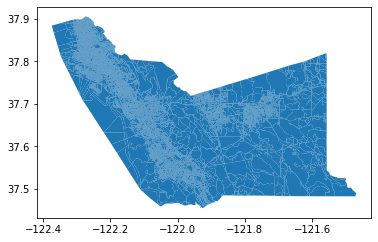

In [24]:
polydf.plot()

*Note: I couldn't find census block geodata for just Oakland, so this is all Alameda County. It shouldn't be an issue becuase I'm matching the polygons to points in Oakland, so the combined dataset should only include the Oakland polygons.*

In [25]:
## Here I'm joining the census block data to left of the 311 data.
joinedgdf = gpd.sjoin(gdf, polydf, how="left")

In [26]:
pd.set_option('display.max_columns', None)
joinedgdf

REQUESTID   DATETIMEINIT       SOURCE                        DESCRIPTION  \
0       927576  7/23/19 15:38  SeeClickFix      Streets - Potholes/Depression   
1       918469  6/25/19 08:34  SeeClickFix         Streets - Guardrail Repair   
2       922854   7/9/19 12:17  SeeClickFix      Streets - Potholes/Depression   
3       917741  6/22/19 16:00  SeeClickFix     Streets - Street Deterioration   
4       927190  7/22/19 16:17  SeeClickFix     Streets - Street Deterioration   
...        ...            ...          ...                                ...   
5280    923771  7/11/19 17:33  SeeClickFix  Streets/Sidewalks - Other/Complex   
5281    921704   7/5/19 14:02        Email      Streets - Potholes/Depression   
5282    916830  6/19/19 12:43  SeeClickFix      Streets - Potholes/Depression   
5283    916568  6/18/19 19:20  SeeClickFix      Streets - Potholes/Depression   
5284    928990  7/28/19 19:02  SeeClickFix      Streets - Potholes/Depression   

     REQCATEGORY  STATUS REFERREDTO DATETIMECLOSED          SRX          SRY  \
0       STREETSW  CLOSED             7/26/19 13:45  6055962.501   2132386.75   
1       STREETSW  CLOSED             7/10/19 18:11  6063364.409  2136673.615   
2       STREETSW  CLOSED             7/22/19 16:40  6055410.001  2116416.751   
3       STREETSW    OPEN                            6076796.539  2120845.822   
4       STREETSW    OPEN                              6071960.1   2128430.85   
...          ...     ...        ...            ...          ...          ...   
5280    STREETSW    OPEN                            6085411.691  2097300.792   
5281    STREETSW    OPEN                            6056022.087  2123898.335   
5282    STREETSW  CLOSED              7/1/19 06:25      6058128   2118764.25   
5283    STREETSW  CLOSED             6/24/19 14:52  6064486.543  2134004.608   
5284    STREETSW  CLOSED             7/30/19 06:15  6054832.646  2131573.798   

     COUNCILDISTRICT BEAT Time to Close        LAT        LONG  \
0               CCD1  12Y             3  37.838160 -122.251303   
1               CCD1  13Y            15  37.850308 -122.225949   
2               CCD2  19X            13  37.794280 -122.252180   
3               CCD4  22Y          Open  37.807518 -122.178452   
4               CCD4  13Z          Open  37.828107 -122.195666   
...              ...  ...           ...        ...         ...   
5280            CCD7  32Y          Open  37.743286 -122.147201   
5281            CCD2  14Y          Open  37.814855 -122.250547   
5282            CCD2  17Y            12  37.800866 -122.242927   
5283            CCD1  13Y             6  37.843036 -122.221893   
5284            CCD1  12Y             2  37.835869 -122.255162   

                         geometry  index_right statefp10 mtfcc10 uace10  \
0     POINT (-122.25130 37.83816)      19475.0        06   G5040          
1     POINT (-122.22595 37.85031)       6229.0        06   G5040          
2     POINT (-122.25218 37.79428)      17467.0        06   G5040          
3     POINT (-122.17845 37.80752)        249.0        06   G5040          
4     POINT (-122.19567 37.82811)      21292.0        06   G5040          
...                           ...          ...       ...     ...    ...   
5280  POINT (-122.14720 37.74329)       5806.0        06   G5040          
5281  POINT (-122.25055 37.81486)      22789.0        06   G5040          
5282  POINT (-122.24293 37.80087)       3502.0        06   G5040          
5283  POINT (-122.22189 37.84304)      19699.0        06   G5040          
5284  POINT (-122.25516 37.83587)       8694.0        06   G5040          

          name10   intptlat10 blockce10 awater10 funcstat10  aland10  \
0     Block 2002  +37.8390277      2002        0          S     1686   
1     Block 1058  +37.8520136      1058        0          S   124422   
2     Block 3027  +37.7939228      3027        0          S      938   
3     Block 4010  +37.8138408      4010        0          S  1435012   
4     Block 2006 

Now all of our 311 coordinates have an associated census block, amazing!

In [27]:
joinedgdf['geoid10'].value_counts()

060014045022007    29
060014041021000    28
060014047001002    25
060014045024015    24
060014085003003    23
                   ..
060014087001010     1
060014005001005     1
060014102001005     1
060014017003078     1
060014003002006     1
Name: geoid10, Length: 2248, dtype: int64

Next I'm totalling up the number of occurances of each unique census block number, so we can determine how many requests were made in each census block. This list shows us that one census block had 29 requests in 2019 for example.

In [28]:
## Here I'm creating a new dataset of census block IDs and count of 311 requests
countdf = joinedgdf['geoid10'].value_counts().rename_axis('geoid10').reset_index(name='counts')
print (countdf)

              geoid10  counts
0     060014045022007      29
1     060014041021000      28
2     060014047001002      25
3     060014045024015      24
4     060014085003003      23
...               ...     ...
2243  060014087001010       1
2244  060014005001005       1
2245  060014102001005       1
2246  060014017003078       1
2247  060014003002006       1

[2248 rows x 2 columns]


In [29]:
## And now I'm merging that count data back into the original census block dataset. 
## The goal is to have a count of 311 requests associated with each of Oakland's polygons.
blockcountgdf = polydf.merge(countdf,on='geoid10')
blockcountgdf

statefp10 mtfcc10 uace10      name10   intptlat10 blockce10 awater10  \
0           06   G5040         Block 2002  +37.8010533      2002        0   
1           06   G5040         Block 3007  +37.7949838      3007        0   
2           06   G5040         Block 1008  +37.7976210      1008        0   
3           06   G5040         Block 1016  +37.7631293      1016        0   
4           06   G5040         Block 1006  +37.8007584      1006        0   
...        ...     ...    ...         ...          ...       ...      ...   
2243        06   G5040         Block 1014  +37.8474571      1014        0   
2244        06   G5040         Block 1024  +37.8611524      1024        0   
2245        06   G5040         Block 1009  +37.7862553      1009        0   
2246        06   G5040         Block 2013  +37.7844475      2013        0   
2247        06   G5040         Block 1054  +37.7689713      1054        0   

     funcstat10 aland10          geoid10 tractce10    intptlon10 ur10  \
0             S    2140  060014053012002    405301  -122.2543675        
1             S   11456  060014054013007    405401  -122.2521420        
2             S   11611  060014054011008    405401  -122.2484415        
3             S   13457  060014098001016    409800  -122.1612728        
4             S    8075  060019820001006    982000  -122.2829223        
...         ...     ...              ...       ...           ...  ...   
2243          S   21893  060014004001014    400400  -122.2553884        
2244          S  249433  060014001001024    400100  -122.2376959        
2245          S   12770  060014063001009    406300  -122.2227530        
2246          S     453  060014070002013    407000  -122.2004468        
2247          S     281  060014099001054    409900  -122.1534691        

     countyfp10                                           geometry  counts  
0           001  MULTIPOLYGON (((-122.25395 37.80253, -122.2541...       4  
1           001  MULTIPOLYGON (((-122.25211 37.79567, -122.2519...       1  
2           001  MULTIPOLYGON (((-122.24930 37.79766, -122.2488...       3  
3           001  MULTIPOLYGON (((-122.16011 37.76330, -122.1601...       5  
4           001  MULTIPOLYGON (((-122.28333 37.80116, -122.2833...       1  
...         ...                                                ...     ...  
2243        001  MULTIPOLYGON (((-122.25434 37.84809, -122.2542...       1  
2244        001  MULTIPOLYGON (((-122.24402 37.86074, -122.2439...      10  
2245        001  MULTIPOLYGON (((-122.22333 37.78688, -122.2231...       1  
2246        001  MULTIPOLYGON (((-122.20072 37.78427, -122.2007...       2  
2247        001  MULTIPOLYGON (((-122.15332 37.76868, -122.1536...       1  

[2248 rows x 16 columns]

In [30]:
sorted_blockcountgdf = blockcountgdf.sort_values(by='counts',ascending = False)
sorted_blockcountgdf

statefp10 mtfcc10 uace10      name10   intptlat10 blockce10 awater10  \
1414        06   G5040         Block 2007  +37.8332164      2007        0   
1562        06   G5040         Block 1000  +37.8260833      1000        0   
1589        06   G5040         Block 1002  +37.8136998      1002        0   
1830        06   G5040         Block 4015  +37.8273103      4015        0   
398         06   G5040         Block 1015  +37.8472540      1015    25272   
...        ...     ...    ...         ...          ...       ...      ...   
995         06   G5040         Block 2010  +37.7645715      2010        0   
994         06   G5040         Block 1014  +37.7581397      1014        0   
992         06   G5040         Block 3008  +37.7642315      3008        0   
991         06   G5040         Block 1013  +37.7693875      1013        0   
2247        06   G5040         Block 1054  +37.7689713      1054        0   

     funcstat10 aland10          geoid10 tractce10    intptlon10 ur10  \
1414          S  176161  060014045022007    404502  -122.2114417        
1562          S   55836  060014041021000    404102  -122.2484905        
1589          S  395184  060014047001002    404700  -122.2116078        
1830          S  102849  060014045024015    404502  -122.2085940        
398           S  296701  060014043001015    404300  -122.2292738        
...         ...     ...              ...       ...           ...  ...   
995           S   25719  060014086002010    408600  -122.1885157        
994           S   14780  060014088001014    408800  -122.1935384        
992           S   36998  060014087003008    408700  -122.1931744        
991           S   25503  060014075001013    407500  -122.1952450        
2247          S     281  060014099001054    409900  -122.1534691        

     countyfp10                                           geometry  counts  
1414        001  MULTIPOLYGON (((-122.20938 37.83483, -122.2094...      29  
1562        001  MULTIPOLYGON (((-122.24935 37.82870, -122.2491...      28  
1589        001  MULTIPOLYGON (((-122.21407 37.81247, -122.2144...      25  
1830        001  MULTIPOLYGON (((-122.20626 37.82440, -122.2066...      24  
398         001  MULTIPOLYGON (((-122.23421 37.84691, -122.2342...      23  
...         ...                                                ...     ...  
995         001  MULTIPOLYGON (((-122.18707 37.76554, -122.1868...       1  
994         001  MULTIPOLYGON (((-122.19239 37.75845, -122.1927...       1  
992         001  MULTIPOLYGON (((-122.19108 37.76516, -122.1911...       1  
991         001  MULTIPOLYGON (((-122.19395 37.76905, -122.1942...       1  
2247        001  MULTIPOLYGON (((-122.15332 37.76868, -122.1536...       1  

[2248 rows x 16 columns]

<AxesSubplot:>

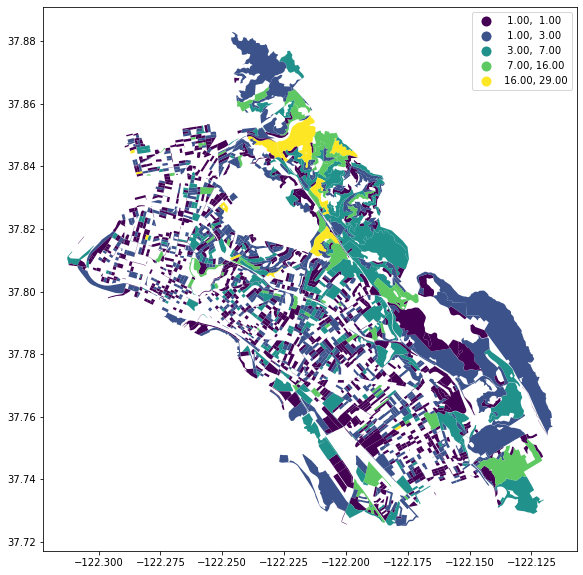

In [31]:
## Ok, let's take our first look at what this looks like visually.
blockcountgdf.plot(figsize=(10,10),
                 column='counts',
                 legend=True, 
                 scheme='NaturalBreaks')

So there's our first map.The blank spaces here represent blocks without any requests.

In [32]:
## Before we can do cooler mapping, let's switch out projection first
blockcountgdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
gdf_web_mercator = blockcountgdf.to_crs(epsg=3857)

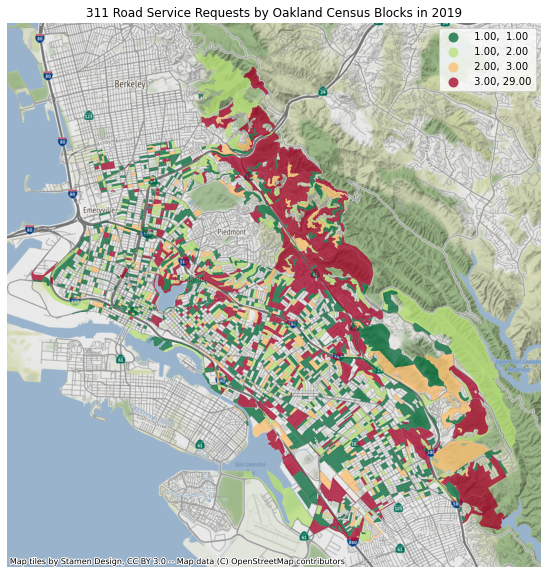

In [34]:
## Now I want to add a basemap and group the number of requests into quantiles.

fig, ax = plt.subplots(figsize=(10, 10))

gdf_web_mercator.plot(column='counts', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=4, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True
           )

ax.axis("off")
ax.set_title("311 Road Service Requests by Oakland Census Blocks in 2019")
ctx.add_basemap(ax)

Ok, because of the weird distrobution, it could only create 4 bins. Let's take a closer look.

In [35]:
blockcountgdf['counts'].describe()

count    2248.000000
mean        2.348310
std         2.516194
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        29.000000
Name: counts, dtype: float64

<AxesSubplot:ylabel='Frequency'>

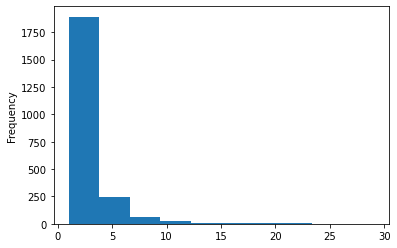

In [36]:
blockcountgdf['counts'].plot.hist(bins=10)

So similar to time to close, the distrobution for number of requests among cenuss blocks is also not normal. Most blocks have 3 or less requests, but a few have a lot more. 

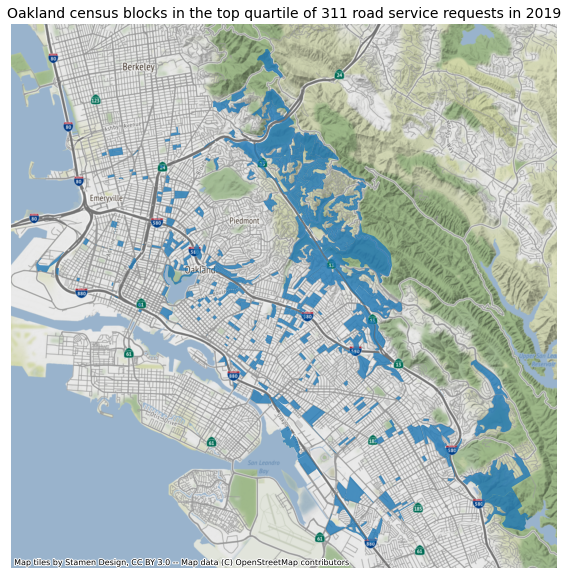

In [37]:
##Let's see where these blocks with the most requests are.

fig, ax = plt.subplots(figsize=(10, 10))

gdf_web_mercator[gdf_web_mercator['counts'] > 3].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks in the top quartile of 311 road service requests in 2019',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

Think a really cool idea would be to add racial data to this data frame. So that each of these blocks were colored by race or income level. 

Potential pitfalls here: 
- Who is using 311? We might need to do some sort of cross analysis to verify. 
- Larger blocks might just have more roads, which means more potholes. I have no idea if there is any way to normalize the data. 

### Mapping Open 311 Requests from 2019 onto Census Blocks

Now I'm going to map just the 311 requests from 2019 that are still Open as of present day.

In [38]:
##To do this, we're going to filter our joined dataset to just open complaints.
joinedgdf_Open = joinedgdf[joinedgdf['Time to Close']=='Open']
joinedgdf_Open.head()

REQUESTID   DATETIMEINIT       SOURCE                     DESCRIPTION  \
3     917741  6/22/19 16:00  SeeClickFix  Streets - Street Deterioration   
4     927190  7/22/19 16:17  SeeClickFix  Streets - Street Deterioration   
7     921902   7/6/19 21:38  SeeClickFix  Streets - Street Deterioration   
9     929347  7/29/19 14:53        Email   Streets - Potholes/Depression   
14    917143  6/20/19 10:49        Phone   Streets - Potholes/Depression   

   REQCATEGORY STATUS REFERREDTO DATETIMECLOSED          SRX          SRY  \
3     STREETSW   OPEN                            6076796.539  2120845.822   
4     STREETSW   OPEN                              6071960.1   2128430.85   
7     STREETSW   OPEN                            6068207.935  2105914.162   
9     STREETSW   OPEN                            6071212.774  2127167.855   
14    STREETSW   OPEN                            6070454.574  2119231.062   

   COUNCILDISTRICT BEAT Time to Close        LAT        LONG  \
3             CCD4  22Y          Open  37.807518 -122.178452   
4             CCD4  13Z          Open  37.828107 -122.195666   
7             CCD5  26X          Open  37.766091 -122.207233   
9             CCD4  13Z          Open  37.824601 -122.198174   
14            CCD4  22Y          Open  37.802770 -122.200299   

                       geometry  index_right statefp10 mtfcc10 uace10  \
3   POINT (-122.17845 37.80752)        249.0        06   G5040          
4   POINT (-122.19567 37.82811)      21292.0        06   G5040          
7   POINT (-122.20723 37.76609)      22886.0        06   G5040          
9   POINT (-122.19817 37.82460)      22147.0        06   G5040          
14  POINT (-122.20030 37.80277)      13588.0        06   G5040          

        name10   intptlat10 blockce10 awater10 funcstat10  aland10  \
3   Block 4010  +37.8138408      4010        0          S  1435012   
4   Block 2006  +37.8276659      2006        0          S    37305   
7   Block 1003  +37.7669070      1003        0          S    28360   
9   Block 1010  +37.8263678      1010        0          S    80704   
14  Block 1003  +37.8067230      1003        0          S   507472   

            geoid10 tractce10    intptlon10 ur10 countyfp10  
3   060014046004010    404600  -122.1852490             001  
4   060014046002006    404600  -122.1945662             001  
7   060014073001003    407300  -122.2067659             001  
9   060014046001010    404600  -122.1964640             001  
14  060014067001003    406700  -122.1992247             001

In [39]:
joinedgdf_Open['geoid10'].value_counts()

060014043001015    19
060014047001002    17
060014045022007    13
060014085003003     9
060014093004010     8
                   ..
060014022002002     1
060014052002003     1
060014007004007     1
060014059013023     1
060014039003005     1
Name: geoid10, Length: 995, dtype: int64

In [40]:
opencountdf = joinedgdf_Open['geoid10'].value_counts().rename_axis('geoid10').reset_index(name='open_counts')
print (opencountdf)

             geoid10  open_counts
0    060014043001015           19
1    060014047001002           17
2    060014045022007           13
3    060014085003003            9
4    060014093004010            8
..               ...          ...
990  060014022002002            1
991  060014052002003            1
992  060014007004007            1
993  060014059013023            1
994  060014039003005            1

[995 rows x 2 columns]


In [41]:
opencountgdf = polydf.merge(opencountdf,on='geoid10')
opencountgdf

statefp10 mtfcc10 uace10      name10   intptlat10 blockce10 awater10  \
0          06   G5040         Block 1008  +37.7976210      1008        0   
1          06   G5040         Block 1016  +37.7631293      1016        0   
2          06   G5040         Block 1018  +37.7998828      1018        0   
3          06   G5040         Block 1001  +37.7938939      1001        0   
4          06   G5040         Block 3006  +37.7707736      3006        0   
..        ...     ...    ...         ...          ...       ...      ...   
990        06   G5040         Block 1003  +37.7575229      1003        0   
991        06   G5040         Block 1009  +37.8497278      1009        0   
992        06   G5040         Block 1014  +37.8474571      1014        0   
993        06   G5040         Block 1024  +37.8611524      1024        0   
994        06   G5040         Block 1009  +37.7862553      1009        0   

    funcstat10 aland10          geoid10 tractce10    intptlon10 ur10  \
0            S   11611  060014054011008    405401  -122.2484415        
1            S   13457  060014098001016    409800  -122.1612728        
2            S   10145  060019820001018    982000  -122.2806683        
3            S   35074  060014059021001    405902  -122.2384029        
4            S   43776  060014083003006    408300  -122.1644107        
..         ...     ...              ...       ...           ...  ...   
990          S   17413  060014096001003    409600  -122.1745703        
991          S   20341  060014004001009    400400  -122.2534800        
992          S   21893  060014004001014    400400  -122.2553884        
993          S  249433  060014001001024    400100  -122.2376959        
994          S   12770  060014063001009    406300  -122.2227530        

    countyfp10                                           geometry  open_counts  
0          001  MULTIPOLYGON (((-122.24930 37.79766, -122.2488...            2  
1          001  MULTIPOLYGON (((-122.16011 37.76330, -122.1601...            3  
2          001  MULTIPOLYGON (((-122.28005 37.79969, -122.2800...            1  
3          001  MULTIPOLYGON (((-122.23903 37.79446, -122.2389...            1  
4          001  MULTIPOLYGON (((-122.16240 37.76977, -122.1623...            3  
..         ...                                                ...          ...  
990        001  MULTIPOLYGON (((-122.17400 37.75832, -122.1735...            1  
991        001  MULTIPOLYGON (((-122.25235 37.84947, -122.2524...            1  
992        001  MULTIPOLYGON (((-122.25434 37.84809, -122.2542...            1  
993        001  MULTIPOLYGON (((-122.24402 37.86074, -122.2439...            4  
994        001  MULTIPOLYGON (((-122.22333 37.78688, -122.2231...            1  

[995 rows x 16 columns]

In the last few lines, I repeated the steps performed for mapping all the requests where we got the value count per block ID and then merged into the polygon dataframe.

In [42]:
opencountgdf['open_counts'].describe()

count    995.000000
mean       1.512563
std        1.283933
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       19.000000
Name: open_counts, dtype: float64

In [43]:
opencountgdf_web_mercator = opencountgdf.to_crs(epsg=3857)

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


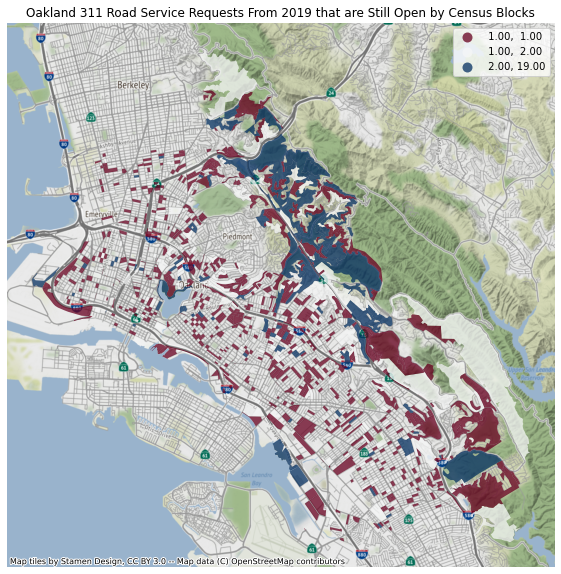

In [44]:
##Here's the map showing the distrobution of 2019 311 requests that are still open
fig, ax = plt.subplots(figsize=(10, 10))

opencountgdf_web_mercator.plot(column='open_counts', 
            cmap='RdBu', 
            scheme='quantiles',
            k=4, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True
           )

ax.axis("off")
ax.set_title("Oakland 311 Road Service Requests From 2019 that are Still Open by Census Blocks")
ctx.add_basemap(ax)

The distrobution is so messed up that's it's literally just those blocks with 1 or 2 and then all other blocks. 

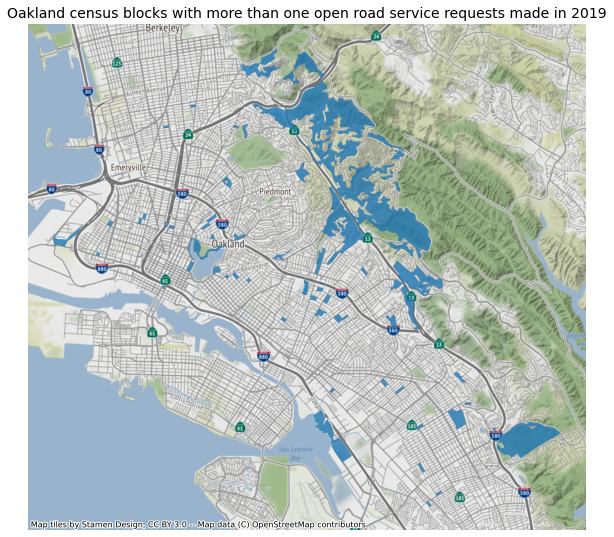

In [45]:
##Let's see those census blocks with more than 2 open requests from 2019. 
fig, ax = plt.subplots(figsize=(10, 10))

opencountgdf_web_mercator[opencountgdf_web_mercator['open_counts'] > 2].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks with more than one open road service requests made in 2019',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

I'm not seeing any huge trends in any of these maps honestly, they seem fairly spread out.

In [46]:
sorted_blockcountgdf.head(10)

statefp10 mtfcc10 uace10      name10   intptlat10 blockce10 awater10  \
1414        06   G5040         Block 2007  +37.8332164      2007        0   
1562        06   G5040         Block 1000  +37.8260833      1000        0   
1589        06   G5040         Block 1002  +37.8136998      1002        0   
1830        06   G5040         Block 4015  +37.8273103      4015        0   
398         06   G5040         Block 1015  +37.8472540      1015    25272   
1404        06   G5040         Block 3003  +37.7564771      3003        0   
173         06   G5040         Block 3008  +37.8110527      3008        0   
2223        06   G5040         Block 1003  +37.8484530      1003        0   
91          06   G5040         Block 3019  +37.8452564      3019        0   
104         06   G5040         Block 3000  +37.8057588      3000        0   

     funcstat10  aland10          geoid10 tractce10    intptlon10 ur10  \
1414          S   176161  060014045022007    404502  -122.2114417        
1562          S    55836  060014041021000    404102  -122.2484905        
1589          S   395184  060014047001002    404700  -122.2116078        
1830          S   102849  060014045024015    404502  -122.2085940        
398           S   296701  060014043001015    404300  -122.2292738        
1404          S    22610  060014085003003    408500  -122.1788697        
173           S    32918  060014038003008    403800  -122.2445830        
2223          S  1158634  060014044001003    404400  -122.2186775        
91            S   269217  060014044003019    404400  -122.2015401        
104           S    40929  060014050003000    405000  -122.2295251        

     countyfp10                                           geometry  counts  
1414        001  MULTIPOLYGON (((-122.20938 37.83483, -122.2094...      29  
1562        001  MULTIPOLYGON (((-122.24935 37.82870, -122.2491...      28  
1589        001  MULTIPOLYGON (((-122.21407 37.81247, -122.2144...      25  
1830        001  MULTIPOLYGON (((-122.20626 37.82440, -122.2066...      24  
398         001  MULTIPOLYGON (((-122.23421 37.84691, -122.2342...      23  
1404        001  MULTIPOLYGON (((-122.17799 37.75740, -122.1778...      23  
173         001  MULTIPOLYGON (((-122.24300 37.81203, -122.2428...      21  
2223        001  MULTIPOLYGON (((-122.22171 37.84543, -122.2219...      21  
91          001  MULTIPOLYGON (((-122.19718 37.84507, -122.1970...      19  
104         001  MULTIPOLYGON (((-122.22730 37.80699, -122.2270...      19

### Pairing the 'Time to Close' Data with Census Blocks

Now that we've mapped the roughly 30% of requests from 2019 that are still open, let's take a look at the closed complaints from 2019 and see what the distrobution was among census blocks.

In [47]:
joinedgdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5285 entries, 0 to 5284
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   REQUESTID        5285 non-null   object  
 1   DATETIMEINIT     5285 non-null   object  
 2   SOURCE           5285 non-null   object  
 3   DESCRIPTION      5285 non-null   object  
 4   REQCATEGORY      5285 non-null   object  
 5   STATUS           5285 non-null   object  
 6   REFERREDTO       5285 non-null   object  
 7   DATETIMECLOSED   5285 non-null   object  
 8   SRX              5285 non-null   object  
 9   SRY              5285 non-null   object  
 10  COUNCILDISTRICT  5285 non-null   object  
 11  BEAT             5285 non-null   object  
 12  Time to Close    5285 non-null   object  
 13  LAT              5285 non-null   float64 
 14  LONG             5285 non-null   float64 
 15  geometry         5285 non-null   geometry
 16  index_right      5279 non-null   f

In [48]:
##Let's filter out the open complaints.
joinedgdf_closed = joinedgdf[joinedgdf['Time to Close']!='Open']
joinedgdf_closed.head()

REQUESTID   DATETIMEINIT       SOURCE                    DESCRIPTION  \
0    927576  7/23/19 15:38  SeeClickFix  Streets - Potholes/Depression   
1    918469  6/25/19 08:34  SeeClickFix     Streets - Guardrail Repair   
2    922854   7/9/19 12:17  SeeClickFix  Streets - Potholes/Depression   
5    926601  7/20/19 15:18  SeeClickFix  Streets - Potholes/Depression   
6    924666  7/15/19 10:07  SeeClickFix  Streets - Potholes/Depression   

  REQCATEGORY  STATUS REFERREDTO DATETIMECLOSED          SRX          SRY  \
0    STREETSW  CLOSED             7/26/19 13:45  6055962.501   2132386.75   
1    STREETSW  CLOSED             7/10/19 18:11  6063364.409  2136673.615   
2    STREETSW  CLOSED             7/22/19 16:40  6055410.001  2116416.751   
5    STREETSW  CLOSED             7/25/19 09:17  6050831.438   2132866.86   
6    STREETSW  CLOSED             7/18/19 17:40      6070383  2112614.251   

  COUNCILDISTRICT BEAT Time to Close        LAT        LONG  \
0            CCD1  12Y             3  37.838160 -122.251303   
1            CCD1  13Y            15  37.850308 -122.225949   
2            CCD2  19X            13  37.794280 -122.252180   
5            CCD1  11X             5  37.839213 -122.269099   
6            CCD4  24Y             3  37.784598 -122.200131   

                      geometry  index_right statefp10 mtfcc10 uace10  \
0  POINT (-122.25130 37.83816)      19475.0        06   G5040          
1  POINT (-122.22595 37.85031)       6229.0        06   G5040          
2  POINT (-122.25218 37.79428)      17467.0        06   G5040          
5  POINT (-122.26910 37.83921)       8901.0        06   G5040          
6  POINT (-122.20013 37.78460)      23457.0        06   G5040          

       name10   intptlat10 blockce10 awater10 funcstat10 aland10  \
0  Block 2002  +37.8390277      2002        0          S    1686   
1  Block 1058  +37.8520136      1058        0          S  124422   
2  Block 3027  +37.7939228      3027        0          S     938   
5  Block 4001  +37.8394961      4001        0          S   19841   
6  Block 2012  +37.7847991      2012        0          S     622   

           geoid10 tractce10    intptlon10 ur10 countyfp10  
0  060014003002002    400300  -122.2513567             001  
1  060014001001058    400100  -122.2261098             001  
2  060014060003027    406000  -122.2518223             001  
5  060014007004001    400700  -122.2683337             001  
6  060014070002012    407000  -122.1997583             001

In [49]:
##Need to make sure the Time to Close is an integer. 
joinedgdf_closed['Time to Close'] = joinedgdf_closed['Time to Close'].astype('int64')

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [50]:
joinedgdf_closed.dtypes

REQUESTID            object
DATETIMEINIT         object
SOURCE               object
DESCRIPTION          object
REQCATEGORY          object
STATUS               object
REFERREDTO           object
DATETIMECLOSED       object
SRX                  object
SRY                  object
COUNCILDISTRICT      object
BEAT                 object
Time to Close         int64
LAT                 float64
LONG                float64
geometry           geometry
index_right         float64
statefp10            object
mtfcc10              object
uace10               object
name10               object
intptlat10           object
blockce10            object
awater10             object
funcstat10           object
aland10              object
geoid10              object
tractce10            object
intptlon10           object
ur10                 object
countyfp10           object
dtype: object

In [51]:
##I'm grouping the data by block ID, but instead of a count like earlier, 
##I'm outputting the median of all the request closure time values associated with each block ID.
closedgdf_grouped = joinedgdf_closed.groupby(['geoid10']).median()[['Time to Close']]
closedgdf_grouped.head(10)

Time to Close
geoid10                       
060014001001011          130.5
060014001001017           25.0
060014001001024          425.5
060014001001026           35.0
060014001001027           12.0
060014001001030           22.0
060014001001033           74.0
060014001001034           98.5
060014001001038           27.0
060014001001039           28.0

In [52]:
##Rename the columns. 
closetimedf = closedgdf_grouped.rename_axis('geoid10').reset_index('geoid10')
print (closetimedf)

              geoid10  Time to Close
0     060014001001011          130.5
1     060014001001017           25.0
2     060014001001024          425.5
3     060014001001026           35.0
4     060014001001027           12.0
...               ...            ...
1769  060019832001023           26.0
1770  060019832001026          373.0
1771  060019832001027           37.0
1772  060019832001044            8.0
1773  060019832001054            1.0

[1774 rows x 2 columns]


In [53]:
##Create a new dataframe from the last line'soutput so that we can merge it back in the polygon gdf.
closetimedf.columns = ['geoid10', 'closure_median']
closetimedf

geoid10  closure_median
0     060014001001011           130.5
1     060014001001017            25.0
2     060014001001024           425.5
3     060014001001026            35.0
4     060014001001027            12.0
...               ...             ...
1769  060019832001023            26.0
1770  060019832001026           373.0
1771  060019832001027            37.0
1772  060019832001044             8.0
1773  060019832001054             1.0

[1774 rows x 2 columns]

In [54]:
##Now merging our new dataframe based on the unique block ID, which should get each polygon a median close time value.
closetimegdf = polydf.merge(closetimedf,on='geoid10')
closetimegdf

statefp10 mtfcc10 uace10      name10   intptlat10 blockce10 awater10  \
0           06   G5040         Block 2002  +37.8010533      2002        0   
1           06   G5040         Block 3007  +37.7949838      3007        0   
2           06   G5040         Block 1008  +37.7976210      1008        0   
3           06   G5040         Block 1016  +37.7631293      1016        0   
4           06   G5040         Block 1006  +37.8007584      1006        0   
...        ...     ...    ...         ...          ...       ...      ...   
1769        06   G5040         Block 2001  +37.8415871      2001        0   
1770        06   G5040         Block 2008  +37.8457090      2008        0   
1771        06   G5040         Block 1024  +37.8611524      1024        0   
1772        06   G5040         Block 2013  +37.7844475      2013        0   
1773        06   G5040         Block 1054  +37.7689713      1054        0   

     funcstat10 aland10          geoid10 tractce10    intptlon10 ur10  \
0             S    2140  060014053012002    405301  -122.2543675        
1             S   11456  060014054013007    405401  -122.2521420        
2             S   11611  060014054011008    405401  -122.2484415        
3             S   13457  060014098001016    409800  -122.1612728        
4             S    8075  060019820001006    982000  -122.2829223        
...         ...     ...              ...       ...           ...  ...   
1769          S   15159  060014006002001    400600  -122.2637076        
1770          S    8459  060014004002008    400400  -122.2587580        
1771          S  249433  060014001001024    400100  -122.2376959        
1772          S     453  060014070002013    407000  -122.2004468        
1773          S     281  060014099001054    409900  -122.1534691        

     countyfp10                                           geometry  \
0           001  MULTIPOLYGON (((-122.25395 37.80253, -122.2541...   
1           001  MULTIPOLYGON (((-122.25211 37.79567, -122.2519...   
2           001  MULTIPOLYGON (((-122.24930 37.79766, -122.2488...   
3           001  MULTIPOLYGON (((-122.16011 37.76330, -122.1601...   
4           001  MULTIPOLYGON (((-122.28333 37.80116, -122.2833...   
...         ...                                                ...   
1769        001  MULTIPOLYGON (((-122.26280 37.84110, -122.2631...   
1770        001  MULTIPOLYGON (((-122.25810 37.84543, -122.2583...   
1771        001  MULTIPOLYGON (((-122.24402 37.86074, -122.2439...   
1772        001  MULTIPOLYGON (((-122.20072 37.78427, -122.2007...   
1773        001  MULTIPOLYGON (((-122.15332 37.76868, -122.1536...   

      closure_median  
0               46.5  
1                7.0  
2                7.0  
3              664.5  
4                9.0  
...              ...  
1769             7.0  
1770            35.0  
1771           425.5  
1772           783.5  
1773             0.0  

[1774 rows x 16 columns]

In [55]:
##Project to mercator
closetimegdf_web_mercator = closetimegdf.to_crs(epsg=3857)

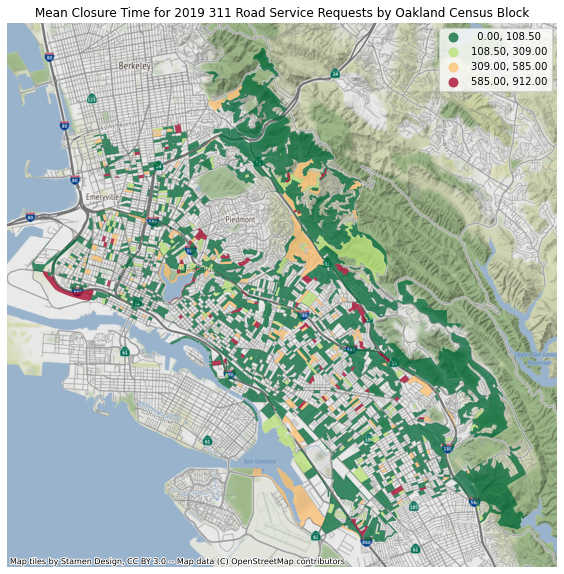

In [56]:
##And map it
fig, ax = plt.subplots(figsize=(10, 10))

# regular count map on the left
closetimegdf_web_mercator.plot(column='closure_median', 
            cmap='RdYlGn_r', 
            scheme='naturalbreaks',
            k=4, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax,
            legend=True
           )

ax.axis("off")
ax.set_title("Mean Closure Time for 2019 311 Road Service Requests by Oakland Census Block")
ctx.add_basemap(ax)

What a journey it was to get here, but this map tells us the median response time to census blocks that made a 311 request in 2019. Pretty cool, although I can't see anything that stands out.

In [57]:
closetimegdf['closure_median'].describe()

count    1774.000000
mean      112.696167
std       188.632831
min         0.000000
25%         9.000000
50%        29.000000
75%        91.875000
max       912.000000
Name: closure_median, dtype: float64

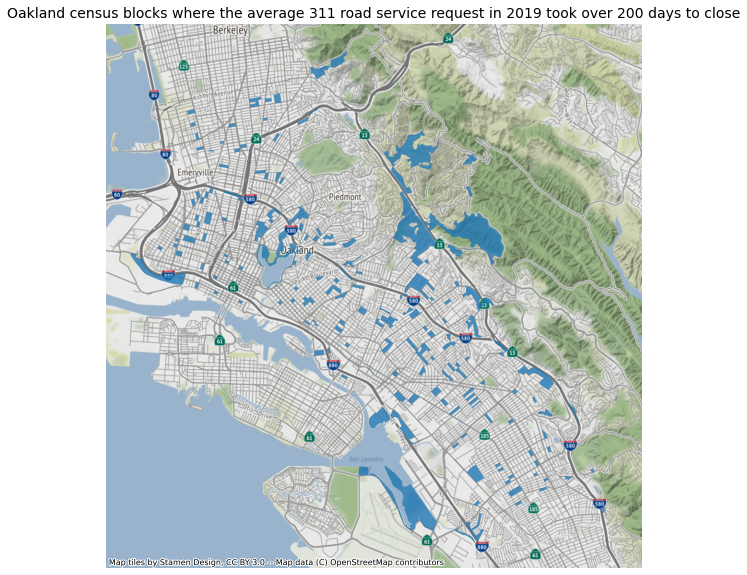

In [58]:
##Let's see the census blocks where the median response was highest
fig, ax = plt.subplots(figsize=(10, 10))

closetimegdf_web_mercator[closetimegdf_web_mercator['closure_median'] > 200].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks where the average 311 road service request in 2019 took over 200 days to close',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

Pretty spread out again.

In [59]:
closetimegdf_web_mercator.to_file("closetimegdf_web_mercator.geojson", driver='GeoJSON')

In [60]:
gdf_no_open.to_file("NoOpen2019gdf.geojson", driver='GeoJSON')

In [63]:
blockcountgdf.to_file("blockcountgdf.geojson", driver='GeoJSON')